# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [2]:
# TODO: Make all necessary imports.
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

import numpy as np
import matplotlib.pyplot as plt
import json
from PIL import Image


## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [3]:
# TODO: Load the dataset with TensorFlow Datasets.


(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'oxford_flowers102',
    split=['train', 'validation', 'test'],
    as_supervised=True,          # returns (image, label)
    with_info=True
)
# TODO: Create a training set, a validation set and a test set.

ds_train, ds_val, ds_test


Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:01<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:01<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:01<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:01<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:01<?, ? MiB/s]

Extraction completed...: 0 file [00:01, ? file/s]
Dl Size...:   0%|          | 1/328 [00:01<10:42,  1.97s/ MiB]

Dl Size...:   1%|          | 2/328 [00:02<10:40,  1.97s/ MiB]

Dl Size...:   1%|          | 3/328 [00:02<10:38,  1.97s/ MiB]

Dl Size...:   1%|          | 4/328 [00:02<10:36,  1.97s/ MiB]

Dl Size...:   2%|▏         | 5/328 [00:02<10:34,  1.97s/ MiB]

Dl Si

Dl Size...:  16%|█▋        | 54/328 [00:03<00:25, 10.80 MiB/s]

Extraction completed...: 0 file [00:03, ? file/s]
Dl Size...:  17%|█▋        | 55/328 [00:03<00:15, 17.44 MiB/s]

Dl Size...:  17%|█▋        | 56/328 [00:04<00:15, 17.44 MiB/s]

Dl Size...:  17%|█▋        | 57/328 [00:04<00:15, 17.44 MiB/s]

Dl Size...:  18%|█▊        | 58/328 [00:04<00:15, 17.44 MiB/s]

Dl Size...:  18%|█▊        | 59/328 [00:04<00:15, 17.44 MiB/s]

Dl Size...:  18%|█▊        | 60/328 [00:04<00:15, 17.44 MiB/s]

Dl Size...:  19%|█▊        | 61/328 [00:04<00:15, 17.44 MiB/s]

Dl Size...:  19%|█▉        | 62/328 [00:04<00:15, 17.44 MiB/s]

Dl Size...:  19%|█▉        | 63/328 [00:04<00:15, 17.44 MiB/s]

Dl Size...:  20%|█▉        | 64/328 [00:04<00:15, 17.44 MiB/s]

Dl Size...:  20%|█▉        | 65/328 [00:04<00:15, 17.44 MiB/s]

Dl Size...:  20%|██        | 66/328 [00:04<00:15, 17.44 MiB/s]

Dl Size...:  20%|██        | 67/328 [00:04<00:14, 17.44 MiB/s]

Dl Size...:  21%|██        | 68/328 [00:04<00:14, 17.4

Dl Size...:  35%|███▌      | 115/328 [00:06<00:08, 23.71 MiB/s]

Dl Size...:  35%|███▌      | 116/328 [00:06<00:08, 23.71 MiB/s]

Dl Size...:  36%|███▌      | 117/328 [00:06<00:08, 23.71 MiB/s]

Dl Size...:  36%|███▌      | 118/328 [00:06<00:08, 23.71 MiB/s]

Dl Size...:  36%|███▋      | 119/328 [00:06<00:08, 23.71 MiB/s]

Dl Size...:  37%|███▋      | 120/328 [00:06<00:08, 23.71 MiB/s]

Dl Size...:  37%|███▋      | 121/328 [00:06<00:08, 23.71 MiB/s]

Dl Size...:  37%|███▋      | 122/328 [00:06<00:08, 23.71 MiB/s]

Dl Size...:  38%|███▊      | 123/328 [00:06<00:08, 23.71 MiB/s]

Dl Size...:  38%|███▊      | 124/328 [00:06<00:08, 23.71 MiB/s]

Dl Size...:  38%|███▊      | 125/328 [00:06<00:08, 23.71 MiB/s]

Dl Size...:  38%|███▊      | 126/328 [00:06<00:08, 23.71 MiB/s]

Dl Size...:  39%|███▊      | 127/328 [00:06<00:08, 23.71 MiB/s]

Dl Size...:  39%|███▉      | 128/328 [00:06<00:08, 23.71 MiB/s]

Dl Size...:  39%|███▉      | 129/328 [00:06<00:08, 23.71 MiB/s]

Dl Size...:  40%|███▉    

Dl Size...:  53%|█████▎    | 175/328 [00:08<00:05, 26.03 MiB/s]

Dl Size...:  54%|█████▎    | 176/328 [00:08<00:05, 26.03 MiB/s]

Dl Size...:  54%|█████▍    | 177/328 [00:08<00:05, 26.03 MiB/s]

Dl Size...:  54%|█████▍    | 178/328 [00:08<00:05, 26.03 MiB/s]

Dl Size...:  55%|█████▍    | 179/328 [00:08<00:05, 26.03 MiB/s]

Dl Size...:  55%|█████▍    | 180/328 [00:08<00:05, 26.03 MiB/s]

Dl Size...:  55%|█████▌    | 181/328 [00:08<00:05, 26.03 MiB/s]

Dl Size...:  55%|█████▌    | 182/328 [00:08<00:05, 26.03 MiB/s]

Dl Size...:  56%|█████▌    | 183/328 [00:08<00:05, 26.03 MiB/s]

Dl Size...:  56%|█████▌    | 184/328 [00:08<00:05, 26.03 MiB/s]

Dl Size...:  56%|█████▋    | 185/328 [00:08<00:05, 26.03 MiB/s]

Dl Size...:  57%|█████▋    | 186/328 [00:08<00:05, 26.03 MiB/s]

Dl Size...:  57%|█████▋    | 187/328 [00:08<00:05, 26.03 MiB/s]

Dl Size...:  57%|█████▋    | 188/328 [00:08<00:05, 26.03 MiB/s]

Dl Size...:  58%|█████▊    | 189/328 [00:08<00:05, 26.03 MiB/s]

Dl Size...:  58%|█████▊  

Dl Size...:  72%|███████▏  | 236/328 [00:10<00:03, 27.36 MiB/s]

Dl Size...:  72%|███████▏  | 237/328 [00:10<00:03, 27.36 MiB/s]

Dl Size...:  73%|███████▎  | 238/328 [00:10<00:03, 27.36 MiB/s]

Dl Size...:  73%|███████▎  | 239/328 [00:10<00:03, 27.36 MiB/s]

Dl Size...:  73%|███████▎  | 240/328 [00:10<00:03, 27.36 MiB/s]

Dl Size...:  73%|███████▎  | 241/328 [00:10<00:03, 27.36 MiB/s]

Dl Size...:  74%|███████▍  | 242/328 [00:10<00:03, 27.36 MiB/s]

Dl Size...:  74%|███████▍  | 243/328 [00:10<00:03, 27.36 MiB/s]

Dl Size...:  74%|███████▍  | 244/328 [00:10<00:03, 27.36 MiB/s]

Dl Size...:  75%|███████▍  | 245/328 [00:10<00:03, 27.36 MiB/s]

Dl Size...:  75%|███████▌  | 246/328 [00:10<00:02, 27.36 MiB/s]

Dl Size...:  75%|███████▌  | 247/328 [00:10<00:02, 27.36 MiB/s]

Dl Size...:  76%|███████▌  | 248/328 [00:10<00:02, 27.36 MiB/s]

Dl Size...:  76%|███████▌  | 249/328 [00:10<00:02, 27.36 MiB/s]

Dl Size...:  76%|███████▌  | 250/328 [00:10<00:02, 27.36 MiB/s]

Dl Size...:  77%|███████▋

Dl Size...:  90%|█████████ | 296/328 [00:12<00:01, 27.73 MiB/s]

Dl Size...:  91%|█████████ | 297/328 [00:12<00:01, 27.73 MiB/s]

Dl Size...:  91%|█████████ | 298/328 [00:12<00:01, 27.73 MiB/s]

Dl Size...:  91%|█████████ | 299/328 [00:12<00:01, 27.73 MiB/s]

Dl Size...:  91%|█████████▏| 300/328 [00:12<00:01, 27.73 MiB/s]

Dl Size...:  92%|█████████▏| 301/328 [00:12<00:00, 27.73 MiB/s]

Dl Size...:  92%|█████████▏| 302/328 [00:12<00:00, 27.73 MiB/s]

Dl Size...:  92%|█████████▏| 303/328 [00:12<00:00, 27.73 MiB/s]

Dl Size...:  93%|█████████▎| 304/328 [00:12<00:00, 27.73 MiB/s]

Dl Size...:  93%|█████████▎| 305/328 [00:12<00:00, 27.73 MiB/s]

Dl Size...:  93%|█████████▎| 306/328 [00:12<00:00, 27.73 MiB/s]

Dl Size...:  94%|█████████▎| 307/328 [00:12<00:00, 27.73 MiB/s]

Dl Size...:  94%|█████████▍| 308/328 [00:12<00:00, 27.73 MiB/s]

Dl Size...:  94%|█████████▍| 309/328 [00:12<00:00, 27.73 MiB/s]

Dl Size...:  95%|█████████▍| 310/328 [00:13<00:00, 27.73 MiB/s]

Dl Size...:  95%|████████

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.80 MiB/s]

Extraction completed...:   0%|          | 0/1057 [00:17<?, ? file/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
t

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.80 MiB/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.80 MiB/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.80 MiB/s]

Extraction completed...: 

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Extraction completed...:   4%|▍         | 329/8189 [00:49<105:57:04, 48.53s/ file]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Siz

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]


Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.80 MiB/s]

Dl Completed...: 100%|██████████| 3/3 [00:59<00:00,  4.89s/ url], 259.36 file/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size..

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.80 MiB/s]IOPub message rate exceeded

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Extraction completed...:  86%|████████▌ | 7054/8189 [01:09<00:03, 329.24 file/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.80 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.80 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.80 MiB/s]

Dl Completed...: 100%|██████████| 3/3 [01:11<00:00,  4.89s/ url], 333.67 file/s]

                                                                             
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteANV81R/oxford_flowers102-train.tfrecord*...:   0%|          | 0/1020 [00:00<?, ? examples/s]
Generating test examples...:  67%|██████▋   | 4104/6149 [00:01<00:00, 4103.00 examples/s]
                                                                                         
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteANV81R/oxford_flowers102-test.tfrecord*...:   0%|          | 0/6149 [00:00<?, ? examples/s]
Shuffling /home/student/tensorflow_datasets/oxford_flowers1

Dataset oxford_flowers102 downloaded and prepared to /home/student/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

## Explore the Dataset

In [4]:
# TODO: Get the number of examples in each set from the dataset info.
num_train = ds_info.splits['train'].num_examples
num_val   = ds_info.splits['validation'].num_examples
num_test  = ds_info.splits['test'].num_examples

print("Train examples:", num_train)
print("Validation examples:", num_val)
print("Test examples:", num_test)
# TODO: Get the number of classes in the dataset from the dataset info.


num_classes = ds_info.features['label'].num_classes
print("Number of classes:", num_classes)

Train examples: 1020
Validation examples: 1020
Test examples: 6149
Number of classes: 102


In [5]:
# TODO: Print the shape and corresponding label of 3 images in the training set.

for image, label in ds_train.take(3):
    print("Image shape:", image.shape, "Label:", label.numpy())

Image shape: (500, 667, 3) Label: 72
Image shape: (500, 666, 3) Label: 84
Image shape: (670, 500, 3) Label: 70


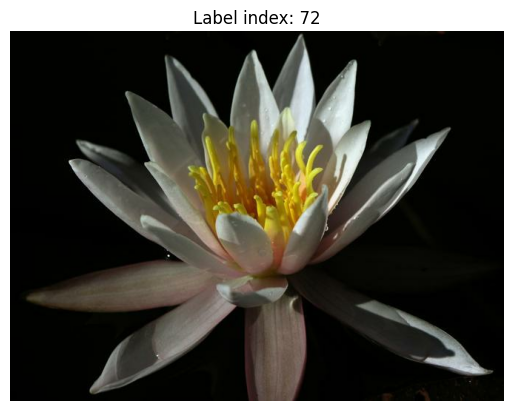

In [6]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 
image, label = next(iter(ds_train))
plt.imshow(image)
plt.title(f"Label index: {label.numpy()}")
plt.axis('off')
plt.show()

### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [7]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)
    
    
def get_class_name(label_index):
    key = str(label_index + 1)
    return class_names.get(key, "Unknown")    

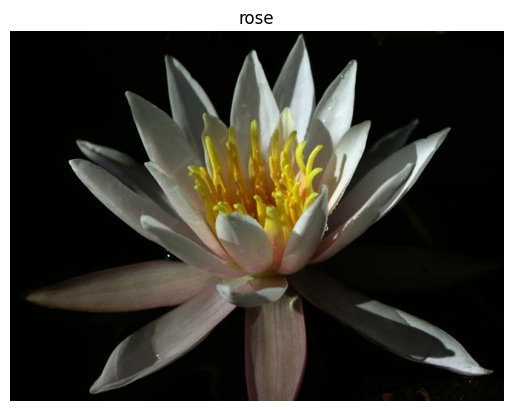

In [8]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 

image, label = next(iter(ds_train))
plt.imshow(image)
plt.title(get_class_name(label.numpy()))
plt.axis('off')
plt.show()

## Create Pipeline

In [9]:
# TODO: Create a pipeline for each set.
IMG_SIZE = 224

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0  # normalize to [0,1]
    return image, label

BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

train_ds = (ds_train
            .map(preprocess, num_parallel_calls=AUTOTUNE)
            .shuffle(1000)
            .batch(BATCH_SIZE)
            .prefetch(AUTOTUNE))

val_ds = (ds_val
          .map(preprocess, num_parallel_calls=AUTOTUNE)
          .batch(BATCH_SIZE)
          .prefetch(AUTOTUNE))

test_ds = (ds_test
           .map(preprocess, num_parallel_calls=AUTOTUNE)
           .batch(BATCH_SIZE)
           .prefetch(AUTOTUNE))


# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [10]:
# TODO: Build and train your network.


feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_url,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    trainable=False           
)

model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
32/32 [==============================] - 13s 142ms/step - loss: 4.6057 - accuracy: 0.0392 - val_loss: 4.0357 - val_accuracy: 0.2510
Epoch 2/5
32/32 [==============================] - 5s 105ms/step - loss: 3.4801 - accuracy: 0.2324 - val_loss: 2.8956 - val_accuracy: 0.4765
Epoch 3/5
32/32 [==============================] - 5s 103ms/step - loss: 2.4353 - accuracy: 0.4343 - val_loss: 2.0682 - val_accuracy: 0.6186
Epoch 4/5
32/32 [==============================] - 5s 102ms/step - loss: 1.7770 - accuracy: 0.5696 - val_loss: 1.6089 - val_accuracy: 0.6824
Epoch 5/5
32/32 [==============================] - 5s 102ms/step - loss: 1.2452 - accuracy: 0.6990 - val_loss: 1.3372 - val_accuracy: 0.7157


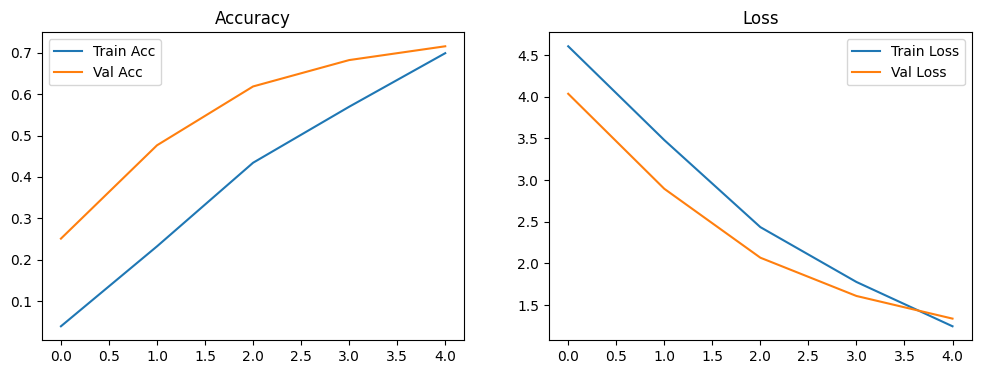

In [11]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.

acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Train Acc')
plt.plot(epochs_range, val_acc, label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [12]:
# TODO: Print the loss and accuracy values achieved on the entire test set.

test_loss, test_acc = model.evaluate(test_ds)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

193/193 [==============================] - 12s 60ms/step - loss: 1.4688 - accuracy: 0.6860
Test loss: 1.4688384532928467
Test accuracy: 0.6859651803970337


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [13]:
# TODO: Save your trained model as a Keras model.

model.save('flower_classifier.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load the Keras Model

Load the Keras model you saved above.

In [14]:
# TODO: Load the Keras model

loaded_model = tf.keras.models.load_model(
    'flower_classifier.h5',
    custom_objects={'KerasLayer': hub.KerasLayer}
)


# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [15]:
# TODO: Create the process_image function

def process_image(image_np):
    """Takes a NumPy image, returns a resized & normalized NumPy image (224,224,3)."""
    image = tf.convert_to_tensor(image_np, dtype=tf.float32)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image.numpy()

To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

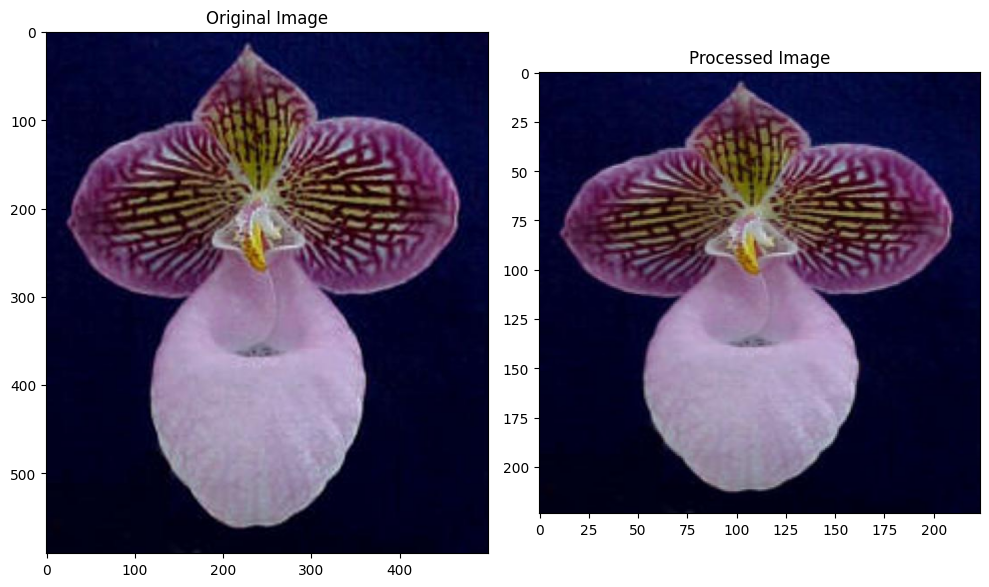

In [16]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [18]:
# TODO: Create the predict function
# TODO: Create the predict function

def predict(image_path, model, top_k=5):
    """Return top_k probabilities and class labels for an image path."""
    im = Image.open(image_path)
    image_np = np.asarray(im)
    processed = process_image(image_np)
    
    # Add batch dimension
    batched = np.expand_dims(processed, axis=0)
    
    preds = model.predict(batched)[0]          # shape (num_classes,)
    top_indices = preds.argsort()[-top_k:][::-1]
    
    top_probs = preds[top_indices]
    # convert indices back to class labels (as strings like '1','2',...)
    top_classes = [str(idx + 1) for idx in top_indices]
    
    return top_probs, top_classes



# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

1/1 [==============================] - 1s 905ms/step


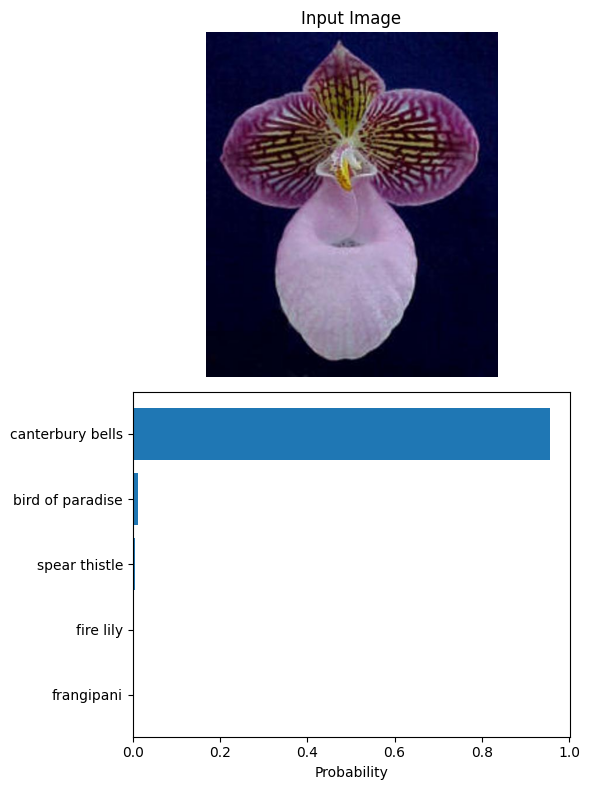

In [19]:
# TODO: Plot the input image along with the top 5 classes

def plot_prediction(image_path, model, top_k=5):
    probs, classes = predict(image_path, model, top_k)
    names = [class_names[c] for c in classes]
    
    # Image
    im = Image.open(image_path)
    
    plt.figure(figsize=(6,8))
    
    plt.subplot(2,1,1)
    plt.imshow(im)
    plt.axis('off')
    plt.title('Input Image')
    
    # Bar chart
    plt.subplot(2,1,2)
    y_pos = np.arange(top_k)
    plt.barh(y_pos, probs)
    plt.yticks(y_pos, names)
    plt.xlabel('Probability')
    plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.show()

plot_prediction('./test_images/hard-leaved_pocket_orchid.jpg', loaded_model, top_k=5)
